In [1]:
pip install basketball_reference_web_scraper

Note: you may need to restart the kernel to use updated packages.


## Importing necessary packages and APIs

In [2]:
# This imports the client
from basketball_reference_web_scraper import client

In [33]:
from basketball_reference_web_scraper import client

# Get 2017-2018 advanced season statistics for all players
data = client.players_advanced_season_totals(season_end_year=2018)

# The players_advanced_season_totals method also supports all output behavior previously described


from basketball_reference_web_scraper import client

# Get 2017-2018 season totals for all players
data2 = client.players_season_totals(season_end_year=2018)

# The players_season_totals method also supports all output behavior previously described

In [34]:
# load the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
#Turn numpy array into dataframe
nba = pd.DataFrame(data=data, index=None)
nba.head(5)

,slug,name,positions,age,team,games_played,minutes_played,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,...,turnover_percentage,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player
0,abrinal01,Álex Abrines,[Position.SHOOTING_GUARD],24,Team.OKLAHOMA_CITY_THUNDER,75,1134,9.0,0.567,0.759,...,7.4,12.7,1.3,1.0,2.2,0.094,-1.9,0.4,-1.5,0.1
1,acyqu01,Quincy Acy,[Position.POWER_FORWARD],27,Team.BROOKLYN_NETS,70,1359,8.2,0.525,0.800,...,13.3,14.4,-0.1,1.1,1.0,0.036,-2.6,0.1,-2.5,-0.2
2,adamsst01,Steven Adams,[Position.CENTER],24,Team.OKLAHOMA_CITY_THUNDER,76,2487,20.6,0.630,0.003,...,13.3,16.7,6.7,3.0,9.7,0.187,1.7,-0.6,1.1,2.0
3,adebaba01,Bam Adebayo,[Position.CENTER],20,Team.MIAMI_HEAT,69,1368,15.7,0.570,0.021,...,13.6,15.9,2.3,1.9,4.2,0.148,-1.1,0.7,-0.4,0.6
4,afflaar01,Arron Afflalo,[Position.SHOOTING_GUARD],32,Team.ORLANDO_MAGIC,53,682,5.8,0.516,0.432,...,10.8,12.5,-0.1,0.2,0.1,0.009,-3.8,-1.5,-5.4,-0.6


In [36]:
#Check the data types
nba.dtypes

slug                              object
name                              object
positions                         object
age                                int64
team                              object
games_played                       int64
minutes_played                     int64
player_efficiency_rating         float64
true_shooting_percentage         float64
three_point_attempt_rate         float64
free_throw_attempt_rate          float64
offensive_rebound_percentage     float64
defensive_rebound_percentage     float64
total_rebound_percentage         float64
assist_percentage                float64
steal_percentage                 float64
block_percentage                 float64
turnover_percentage              float64
usage_percentage                 float64
offensive_win_shares             float64
defensive_win_shares             float64
win_shares                       float64
win_shares_per_48_minutes        float64
offensive_box_plus_minus         float64
defensive_box_pl

In [37]:
#Check num values
nba.isnull().sum()

slug                             0
name                             0
positions                        0
age                              0
team                             0
games_played                     0
minutes_played                   0
player_efficiency_rating         0
true_shooting_percentage         0
three_point_attempt_rate         0
free_throw_attempt_rate          0
offensive_rebound_percentage     0
defensive_rebound_percentage     0
total_rebound_percentage         0
assist_percentage                0
steal_percentage                 0
block_percentage                 0
turnover_percentage              0
usage_percentage                 0
offensive_win_shares             0
defensive_win_shares             0
win_shares                       0
win_shares_per_48_minutes        0
offensive_box_plus_minus         0
defensive_box_plus_minus         0
box_plus_minus                   0
value_over_replacement_player    0
dtype: int64

#### Notice that data is clean!

### Exploratory Analysis

#### Now, I would like to look at some features that interact well with PER statistics. PER has become the most commonly used advanced metric. PER measures a player's per-minute productivity.  

#### PER takes into account accomplishments, such as field goals, 3-pointers, assists, rebounds, blocks and steals, and negative results, such as missed shots, turnovers and personal fouls. Top players can generally be found at the top of the list, so its a nice snapshot of where players stand in relationship to one another.

In [38]:
#Remove players that have not played more than half of the nba games in 2017
nbadata = nba[nba['games_played']>42]
nbadata.head()

,slug,name,positions,age,team,games_played,minutes_played,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,...,turnover_percentage,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player
0,abrinal01,Álex Abrines,[Position.SHOOTING_GUARD],24,Team.OKLAHOMA_CITY_THUNDER,75,1134,9.0,0.567,0.759,...,7.4,12.7,1.3,1.0,2.2,0.094,-1.9,0.4,-1.5,0.1
1,acyqu01,Quincy Acy,[Position.POWER_FORWARD],27,Team.BROOKLYN_NETS,70,1359,8.2,0.525,0.800,...,13.3,14.4,-0.1,1.1,1.0,0.036,-2.6,0.1,-2.5,-0.2
2,adamsst01,Steven Adams,[Position.CENTER],24,Team.OKLAHOMA_CITY_THUNDER,76,2487,20.6,0.630,0.003,...,13.3,16.7,6.7,3.0,9.7,0.187,1.7,-0.6,1.1,2.0
3,adebaba01,Bam Adebayo,[Position.CENTER],20,Team.MIAMI_HEAT,69,1368,15.7,0.570,0.021,...,13.6,15.9,2.3,1.9,4.2,0.148,-1.1,0.7,-0.4,0.6
4,afflaar01,Arron Afflalo,[Position.SHOOTING_GUARD],32,Team.ORLANDO_MAGIC,53,682,5.8,0.516,0.432,...,10.8,12.5,-0.1,0.2,0.1,0.009,-3.8,-1.5,-5.4,-0.6


nbadata['player_efficiency_rating'].plot.hist()

In [39]:
from scipy import stats
stats.normaltest(nbadata['player_efficiency_rating'])

NormaltestResult(statistic=23.32911246443724, pvalue=8.593055059089773e-06)

#### It is not normally distribution because it is less than 0.05 p-value. Since the p-value is less than 0.05 we can reject the null hypothesis that there is no difference between mean and conclude that 

### Lets look at how player efficiency rating interacts with the other variables.

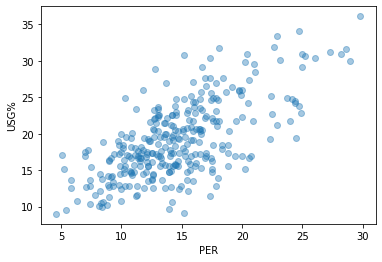

In [40]:
#Interaction with usage rate%
plt.scatter(nbadata['player_efficiency_rating'], nbadata['usage_percentage'], alpha=0.4)
plt.xlabel('PER')
plt.ylabel('USG%')
plt.show()

#### This shows a positive correlation between Player Efficiency rating (PER) and Usage Rate % (USG%). Player Efficiency Rating (PER) attempts to boil all the players contribution into one single number. Usage rate is the percentage of team plays that is used by one player while he was on the floor.

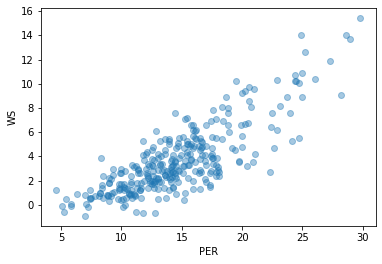

In [41]:
#Interaction with Win Share
plt.scatter(nbadata['player_efficiency_rating'], nbadata['win_shares'], alpha=0.4)
plt.xlabel('PER')
plt.ylabel('WS')
plt.show()

#### This shows a slight positive correlation between Player Efficiency rating and Wins Share (WS). Win share is a metric that estimates the number of wins a player produces for his team. 

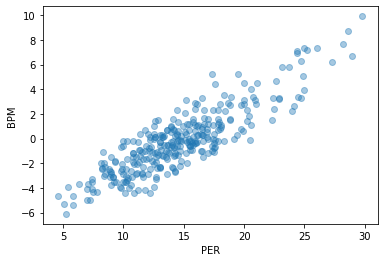

In [42]:
#Interaction with efficiency differential
plt.scatter(nbadata['player_efficiency_rating'], nbadata['box_plus_minus'], alpha=0.4)
plt.xlabel('PER')
plt.ylabel('BPM')
plt.show()

#### This shows a slight positive correlation between Player Efficiency rating and box plus minus (BPM). BPM is a metric for evaluating basketball players' quality and contribution to the team. 

In [43]:
# I Selected this variables because they are the most important advanced statistics and commonly used.
nbaset = nbadata[['name', 'positions', 'team', 'player_efficiency_rating', 'usage_percentage', 'win_shares', 'box_plus_minus', 'value_over_replacement_player']]
nbaset.head()

,name,positions,team,player_efficiency_rating,usage_percentage,win_shares,box_plus_minus,value_over_replacement_player
0,Álex Abrines,[Position.SHOOTING_GUARD],Team.OKLAHOMA_CITY_THUNDER,9.0,12.7,2.2,-1.5,0.1
1,Quincy Acy,[Position.POWER_FORWARD],Team.BROOKLYN_NETS,8.2,14.4,1.0,-2.5,-0.2
2,Steven Adams,[Position.CENTER],Team.OKLAHOMA_CITY_THUNDER,20.6,16.7,9.7,1.1,2.0
3,Bam Adebayo,[Position.CENTER],Team.MIAMI_HEAT,15.7,15.9,4.2,-0.4,0.6
4,Arron Afflalo,[Position.SHOOTING_GUARD],Team.ORLANDO_MAGIC,5.8,12.5,0.1,-5.4,-0.6


In [58]:
nbaset.to_excel('nbaset.xlsx', index=False, header=True)

In [45]:
#Rename the columns
nbaset = nbaset.rename(columns={'player_efficiency_rating':'PER', 'usage_percentage':'USG%','win_shares':'WS','box_plus_minus':'BPM', 'value_over_replacement_player':'VOR'})

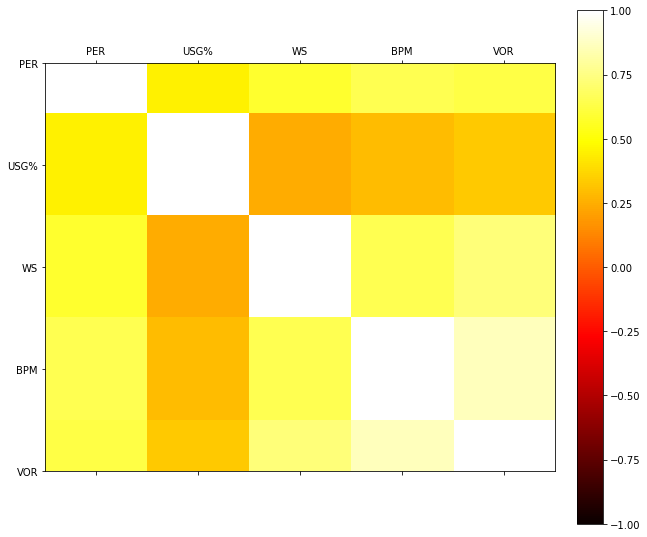

In [46]:
# Obtain figure associated with the plot we want to create
dfCorrelation = nbaset.corr('kendall')
fig = plt.figure()

# Create heatmap subplot  
plot_axes = fig.add_subplot(111) 
heatmap = plot_axes.matshow(dfCorrelation, vmin=-1, vmax=1, cmap='hot')

# Add a colorbar on the right based on the heatmap
fig.colorbar(heatmap, fraction=0.046, pad=0.04)

# Create labels with column names
ticks = np.arange(0, dfCorrelation.columns.size, 1) # create a numpy array from 0 to column size
plot_axes.set_xticks(ticks)
plot_axes.set_yticks(ticks)
plot_axes.set_yticklabels(dfCorrelation.columns.values)
plot_axes.set_xticklabels(dfCorrelation.columns.values)


# Set size
fig.set_size_inches((10,10))

In [69]:
# This data shows players in 2017-2018 season that were in the All NBA Team. 0 is a no and 1 as a yes.
dataset = pd.read_excel('nbaset.xlsx')
dataset.head()

,name,All_NBA_Team
0,Álex Abrines,0
1,Quincy Acy,0
2,Steven Adams,0
3,Bam Adebayo,0
4,Arron Afflalo,0


In [71]:
new_data = pd.merge(nbaset, dataset, on=['name'], how='left')
new_data.head()

,name,positions,team,PER,USG%,WS,BPM,VOR,All_NBA_Team
0,Álex Abrines,[Position.SHOOTING_GUARD],Team.OKLAHOMA_CITY_THUNDER,9.0,12.7,2.2,-1.5,0.1,0
1,Quincy Acy,[Position.POWER_FORWARD],Team.BROOKLYN_NETS,8.2,14.4,1.0,-2.5,-0.2,0
2,Steven Adams,[Position.CENTER],Team.OKLAHOMA_CITY_THUNDER,20.6,16.7,9.7,1.1,2.0,0
3,Bam Adebayo,[Position.CENTER],Team.MIAMI_HEAT,15.7,15.9,4.2,-0.4,0.6,0
4,Arron Afflalo,[Position.SHOOTING_GUARD],Team.ORLANDO_MAGIC,5.8,12.5,0.1,-5.4,-0.6,0


In [88]:
#Sort Values by PER
PER = new_data.sort_values(by=['PER'], ascending=False).head(10)
PER_new = PER[PER['All_NBA_Team'] == 1].shape[0]
print('The number of All NBA Team players that are in the top 10 are ' + str(PER_new))

The number of All NBA Team players that are in the top 10 are 9


In [89]:
#Sort Values by USG%
USG = new_data.sort_values(by=['USG%'], ascending=False).head(10)
USG_new = USG[USG['All_NBA_Team'] == 1].shape[0]
print('The number of All NBA Team players that are in the top 10 are ' + str(USG_new))

The number of All NBA Team players that are in the top 10 are 6


In [90]:
#Sort Values by WS
WS = new_data.sort_values(by=['WS'], ascending=False).head(10)
WS_new = WS[WS['All_NBA_Team'] == 1].shape[0]
print('The number of All NBA Team players that are in the top 10 are ' + str(WS_new))

The number of All NBA Team players that are in the top 10 are 8


In [91]:
#Sort Values by BPM
BPM = new_data.sort_values(by=['BPM'], ascending=False).head(10)
BPM_new = BPM[BPM['All_NBA_Team'] == 1].shape[0]
print('The number of All NBA Team players that are in the top 10 are ' + str(BPM_new))

The number of All NBA Team players that are in the top 10 are 7


In [92]:
#Sort Values by VOR
VOR = new_data.sort_values(by=['VOR'], ascending=False).head(10)
VOR_new = VOR[VOR['All_NBA_Team'] == 1].shape[0]
print('The number of All NBA Team players that are in the top 10 are ' + str(VOR_new))

The number of All NBA Team players that are in the top 10 are 9


### PER and VOR are the NBA stats that show the most All_NBA Team

## Linear Regression model

In [130]:
# Choose predictive features (independent variables)
dfX = new_data[['USG%', 'WS', 'BPM', 'VOR', 'PER']]

# Choose target variable
dfY = new_data['All_NBA_Team']

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, test_size=0.33, random_state=0)

In [132]:
# Create linear regression! (Yay!)

from sklearn.linear_model import LinearRegression

# Create regressor object
linearRegression2 = LinearRegression()

# Fit data
linearRegression2.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

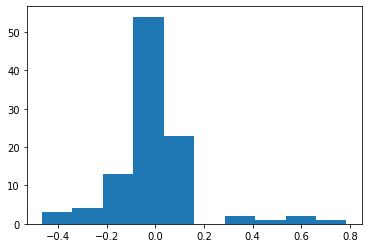

In [133]:
Y_predicted = linearRegression2.predict(X_test)

Residuals = Y_test - Y_predicted
plt.hist(Residuals)
plt.show()
#The Residuals look almost normal distributed

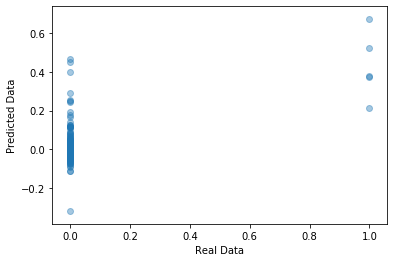

In [134]:
plt.scatter(Y_test, Y_predicted, alpha=0.4)
plt.xlabel('Real Data')
plt.ylabel('Predicted Data')
plt.show()

In [135]:
DiffSumResiduals = (Y_predicted - np.mean(Y_test))**2
DiffSumActual = (Y_test - np.mean(Y_test))**2
rSquared2 = DiffSumResiduals.sum()/DiffSumActual.sum()

print('R^2:', str(rSquared2))
print('The R^2 is high and is a good evidence that this model is a good predictor')

R^2: 0.45010975001137454
The R^2 is high and is a good evidence that this model is a good predictor


## Logistics Regression

In [112]:
#Predictive Variables
dfM = new_data[['USG%', 'WS', 'BPM', 'VOR','PER']]
dfN = new_data['All_NBA_Team']

In [113]:
# Import module for cross validation
from sklearn.model_selection import train_test_split

# Break the data
M_train, M_test, N_train, N_test = train_test_split(dfM, dfN, test_size=0.33, random_state=0)

In [114]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

dfVIF = add_constant(dfM)
pd.DataFrame([variance_inflation_factor(dfVIF.values, i) for i in range(dfVIF.shape[1])], index=dfVIF.columns)

/Users/abdirahmanali/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,0
const,48.800338
USG%,2.916640
WS,9.749135
BPM,14.515755
VOR,20.584347
PER,8.796675


In [115]:
# Logistic Regression!

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Break the data into training and testing set
M_train, M_test, N_train, N_test = train_test_split(dfM, dfN, test_size=0.33, random_state=0)

# Create logistic regression variable
logreg = LogisticRegression()

# Fit data!
logreg.fit(M_train, N_train)

/Users/abdirahmanali/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
#Logistic Regression Model
N_predicted = logreg.predict(M_test)

In [117]:
#K-Fold Test - Logistic Regression
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=5, random_state=0)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, M_train, N_train, cv=kfold, scoring=scoring)

# Mean accuracy - Logistics Regression
results.mean()

/Users/abdirahmanali/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/abdirahmanali/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/abdirahmanali/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/abdirahmanali/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/abdirahmanali/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:

0.9714285714285713

## Decision Tree

In [118]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(min_samples_split=5)
tree.fit(M_train, N_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [119]:
#Decision Tree Model
decisiontree = tree.predict(M_test)
decisiontree

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [120]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(N_test, decisiontree))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        98
           1       0.25      0.20      0.22         5

    accuracy                           0.93       103
   macro avg       0.60      0.58      0.59       103
weighted avg       0.93      0.93      0.93       103



In [121]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="mytree.dot", feature_names=M_train.columns)

In [122]:
# K-Fold test - Decision Tree
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=5, random_state=0)
modelCV = DecisionTreeClassifier(min_samples_split=5)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, M_train, N_train, cv=kfold, scoring=scoring)

# Mean accuracy - Decision Trees
results.mean()

0.9664343786295007

## Random Forest

In [123]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators = 300, min_samples_split=5)
randomforest.fit(M_train, N_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [124]:
#Random Forest Model
N_predicted = randomforest.predict(M_test)
print(classification_report(N_test, N_predicted))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        98
           1       1.00      0.20      0.33         5

    accuracy                           0.96       103
   macro avg       0.98      0.60      0.66       103
weighted avg       0.96      0.96      0.95       103



In [125]:
# K-Fold test - Random Forest Model
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=5, random_state=0)
modelCV = RandomForestClassifier(n_estimators = 300, min_samples_split=5)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, M_train, N_train, cv=kfold, scoring=scoring)

# Mean accuracy for Random Forest Model
forestmodel = results.mean()
forestmodel

0.9761904761904763

## Neural Network

In [126]:
# Scale features (really important for neural networks!)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(dfM)

# Scale X values
scaled_features = scaler.transform(dfM)
dfScaledX = pd.DataFrame(scaled_features, columns=dfM.columns)
dfScaledX.head()

,USG%,WS,BPM,VOR,PER
0,-1.212307,-0.517606,-0.486618,-0.583603,-1.215237
1,-0.890255,-0.945308,-0.864198,-0.791225,-1.389571
2,-0.454539,2.155530,0.495090,0.731334,1.312601
3,-0.606093,0.195230,-0.071280,-0.237567,0.244808
4,-1.250195,-1.266084,-1.959180,-1.068054,-1.912572


In [127]:
# Split the data between training and testing set
from sklearn.model_selection import train_test_split
X2_train, X2_test, Y2_train, Y2_test = train_test_split(dfScaledX, dfN, test_size=0.33, random_state=0)

In [128]:
# Create neural network classifier and fit the data!

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=0)
clf.fit(X2_train, Y2_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [129]:
# Create prediction table on the test set
Y2_predicted = clf.predict(X2_test)
clf.score(X2_test, Y2_test)

0.9514563106796117